In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
train = pd.read_csv("Crop_data.csv")
print(train.shape)


(2200, 8)


In [3]:
NAs = pd.concat([train.isnull().sum()], axis=1, keys=["Train"])
NAs[NAs.sum(axis=1) > 0]


,Train


In [4]:
train = pd.get_dummies(train, columns=["label"], prefix=["label"])

# Check the updated DataFrame with one-hot encoded 'label' column
print(train.head())

    N   P   K  temperature   humidity        ph    rainfall  label_apple  \
0  90  42  43    20.879744  82.002744  6.502985  202.935536            0   
1  85  58  41    21.770462  80.319644  7.038096  226.655537            0   
2  60  55  44    23.004459  82.320763  7.840207  263.964248            0   
3  74  35  40    26.491096  80.158363  6.980401  242.864034            0   
4  78  42  42    20.130175  81.604873  7.628473  262.717340            0   

   label_banana  label_blackgram  ...  label_mango  label_mothbeans  \
0             0                0  ...            0                0   
1             0                0  ...            0                0   
2             0                0  ...            0                0   
3             0                0  ...            0                0   
4             0                0  ...            0                0   

   label_mungbean  label_muskmelon  label_orange  label_papaya  \
0               0                0             0  

In [5]:
print(train.columns)


Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'label_apple', 'label_banana', 'label_blackgram', 'label_chickpea',
       'label_coconut', 'label_coffee', 'label_cotton', 'label_grapes',
       'label_jute', 'label_kidneybeans', 'label_lentil', 'label_maize',
       'label_mango', 'label_mothbeans', 'label_mungbean', 'label_muskmelon',
       'label_orange', 'label_papaya', 'label_pigeonpeas', 'label_pomegranate',
       'label_rice', 'label_watermelon'],
      dtype='object')


In [6]:
# Create a new column 'label' by combining the one-hot encoded columns
train['label'] = train[['label_apple', 'label_banana', 'label_blackgram', 'label_chickpea',
                       'label_coconut', 'label_coffee', 'label_cotton', 'label_grapes',
                       'label_jute', 'label_kidneybeans', 'label_lentil', 'label_maize',
                       'label_mango', 'label_mothbeans', 'label_mungbean', 'label_muskmelon',
                       'label_orange', 'label_papaya', 'label_pigeonpeas', 'label_pomegranate',
                       'label_rice', 'label_watermelon']].idxmax(axis=1)

# Drop the one-hot encoded columns
train.drop(['label_apple', 'label_banana', 'label_blackgram', 'label_chickpea',
            'label_coconut', 'label_coffee', 'label_cotton', 'label_grapes',
            'label_jute', 'label_kidneybeans', 'label_lentil', 'label_maize',
            'label_mango', 'label_mothbeans', 'label_mungbean', 'label_muskmelon',
            'label_orange', 'label_papaya', 'label_pigeonpeas', 'label_pomegranate',
            'label_rice', 'label_watermelon'], axis=1, inplace=True)


In [7]:
from sklearn.model_selection import train_test_split

X = train.drop("label", axis=1)  # Features (excluding the target variable)
y = train["label"]              # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
rf_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.9863636363636363
Classification Report:
                    precision    recall  f1-score   support

      label_apple       1.00      1.00      1.00        34
     label_banana       1.00      1.00      1.00        26
  label_blackgram       0.96      1.00      0.98        26
   label_chickpea       1.00      1.00      1.00        34
    label_coconut       1.00      1.00      1.00        33
     label_coffee       1.00      1.00      1.00        30
     label_cotton       1.00      1.00      1.00        28
     label_grapes       1.00      1.00      1.00        23
       label_jute       0.86      0.94      0.90        34
label_kidneybeans       1.00      1.00      1.00        36
     label_lentil       0.96      1.00      0.98        22
      label_maize       1.00      1.00      1.00        26
      label_mango       1.00      1.00      1.00        32
  label_mothbeans       1.00      0.94      0.97        34
   label_mungbean       1.00      1.00      1.00        30
  

n_estimators=1:
Training Accuracy: 1.0
Testing Accuracy: 0.9863636363636363
Classification Report:
 {'label_rice': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 34.0}, 'label_maize': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 26.0}, 'label_chickpea': {'precision': 0.9629629629629629, 'recall': 1.0, 'f1-score': 0.9811320754716981, 'support': 26.0}, 'label_kidneybeans': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 34.0}, 'label_pigeonpeas': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 33.0}, 'label_mothbeans': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30.0}, 'label_mungbean': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 28.0}, 'label_blackgram': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23.0}, 'label_lentil': {'precision': 0.8648648648648649, 'recall': 0.9411764705882353, 'f1-score': 0.9014084507042254, 'support': 34.0}, 'label_pomegranate': {'precision': 1.0, 're

n_estimators=64:
Training Accuracy: 1.0
Testing Accuracy: 0.9863636363636363
Classification Report:
 {'label_rice': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 34.0}, 'label_maize': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 26.0}, 'label_chickpea': {'precision': 0.9629629629629629, 'recall': 1.0, 'f1-score': 0.9811320754716981, 'support': 26.0}, 'label_kidneybeans': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 34.0}, 'label_pigeonpeas': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 33.0}, 'label_mothbeans': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30.0}, 'label_mungbean': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 28.0}, 'label_blackgram': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 23.0}, 'label_lentil': {'precision': 0.8648648648648649, 'recall': 0.9411764705882353, 'f1-score': 0.9014084507042254, 'support': 34.0}, 'label_pomegranate': {'precision': 1.0, 'r

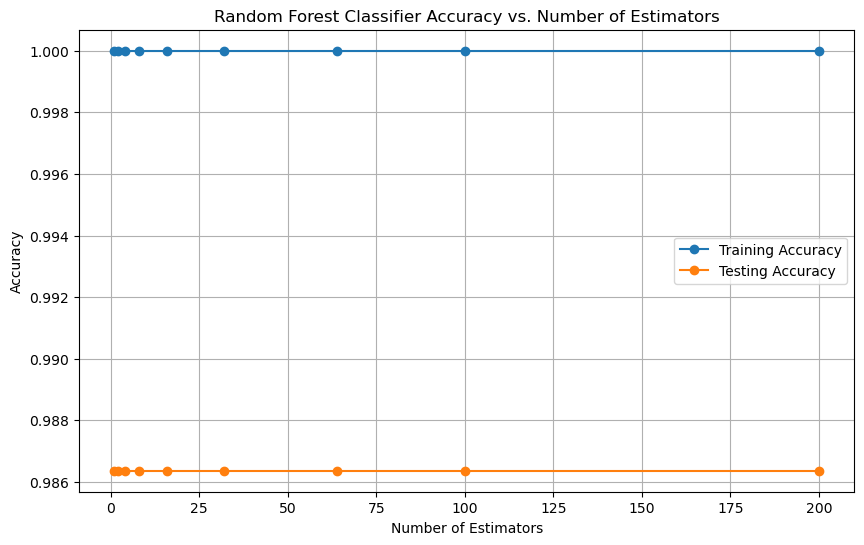

In [10]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

# Create empty lists to store the training and testing results
train_results = []
test_results = []

# Iterate through different values of n_estimators
for estimator in n_estimators:
    # Initialize the RandomForestClassifier with the current value of n_estimators
    rf_classifier = DecisionTreeClassifier( random_state=42)

    # Train the model on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the training and testing data
    train_pred = rf_classifier.predict(X_train)
    test_pred = rf_classifier.predict(X_test)

    # Calculate accuracy for training and testing data
    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    # Generate a classification report for testing data
    report = classification_report(y_test, test_pred, target_names=train['label'].unique(), output_dict=True)

    # Append results to the lists
    train_results.append(train_accuracy)
    test_results.append(test_accuracy)

    # Print the results for the current estimator value
    print(f"n_estimators={estimator}:")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("Classification Report:\n", report)
    print("======================================")

# Plot the accuracy results for different n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators, train_results, label="Training Accuracy", marker='o')
plt.plot(n_estimators, test_results, label="Testing Accuracy", marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Random Forest Classifier Accuracy vs. Number of Estimators")
plt.legend()
plt.grid()
plt.show()

In [11]:
# Assume you have a trained RandomForestClassifier called rf_classifier

# Create a dictionary with input data
input_data = {
    "N": 45,          # Example values, replace with your actual input data
    "P": 30,
    "K": 25,
    "temperature": 28,
    "humidity": 65,
    "ph": 6.5,
    "rainfall": 110
}

# Convert the input data to a DataFrame
input_df = pd.DataFrame([input_data])

# Make predictions for the input data
prediction = rf_classifier.predict(input_df)

# The 'prediction' variable now contains the predicted crop label
print("Predicted Crop Label:", prediction[0])


Predicted Crop Label: label_mango
